# Download a Himawari SST image just off Japan

## Install these packages:

### https://remote-sensing.readthedocs.io/en/latest/

### https://wrangler.readthedocs.io/en/latest/

In [20]:
# imports
from importlib import reload

import numpy as np
import pandas
import os

import h5py
import xarray
from pyproj import Geod

from matplotlib import pyplot as plt

from ocpy.utils import coords as oc_coords

from remote_sensing.plotting import globe
from remote_sensing.download import podaac
from remote_sensing.plotting import utils as putils

from wrangler.tables import io as wr_tab_io
from wrangler.plotting import cutout as plot_cutout
from wrangler.datasets import loader 
from wrangler import datasets
from wrangler.extract import grab_and_go 

# Grab an image

In [2]:
reload(loader)
aios_ds = loader.load_dataset('H09_L3C')

In [3]:
t0 = '2024-01-01T00:00:00'
t1 = '2024-01-01T01:00:00'
#
local_files = grab_and_go.grab(aios_ds, t0, t1)

Using default download directory: /home/xavier/Projects/Oceanography/data/Remote_Sensing/PODAAC
File downloaded: /home/xavier/Projects/Oceanography/data/Remote_Sensing/PODAAC/H09-AHI-L3C-ACSPO-v2.90/20240101000000-STAR-L3C_GHRSST-SSTsubskin-AHI_H09-ACSPO_V2.90-v02.0-fv01.0.nc
Downloaded 1 files, failed on 0 files, skipped 0 existing files.


## Check it

In [18]:
path = '/home/xavier/Projects/Oceanography/data/Remote_Sensing/PODAAC/H09-AHI-L3C-ACSPO-v2.90'
dfile = os.path.join(path, '20240101000000-STAR-L3C_GHRSST-SSTsubskin-AHI_H09-ACSPO_V2.90-v02.0-fv01.0.nc')
df = xarray.open_dataset(dfile)
df

<xarray.Dataset> Size: 9GB
Dimensions:                  (lon: 18000, lat: 9000, time: 1)
Coordinates:
  * lon                      (lon) float32 72kB -180.0 -180.0 ... 180.0 180.0
  * lat                      (lat) float32 36kB 89.99 89.97 ... -89.97 -89.99
  * time                     (time) datetime64[ns] 8B 2024-01-01
Data variables: (12/13)
    quality_level            (time, lat, lon) float32 648MB ...
    l2p_flags                (time, lat, lon) int16 324MB ...
    or_number_of_pixels      (time, lat, lon) float64 1GB ...
    sea_surface_temperature  (time, lat, lon) float32 648MB ...
    dt_analysis              (time, lat, lon) float32 648MB ...
    satellite_zenith_angle   (time, lat, lon) float32 648MB ...
    ...                       ...
    sses_standard_deviation  (time, lat, lon) float32 648MB ...
    wind_speed               (time, lat, lon) float32 648MB ...
    sst_dtime                (time, lat, lon) timedelta64[ns] 1GB ...
    crs                      int32 4B ...
    sst_gradient_magnitude   (time, lat, lon) float32 648MB ...
    sst_front_position       (time, lat, lon) float32 648MB ...
Attributes: (12/56)
    Conventions:                CF-1.7, ACDD-1.3
    acknowledgement:            Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    SSTs are a weighted average of the SSTs of co...
    creator_email:              Alex.Ignatov@noaa.gov
    creator_name:               Alex Ignatov
    ...                         ...
    col_start:                  0
    col_count:                  18000
    l3u_bias_subskin_night:     0.0
    l3u_bias_subskin_day:       0.0
    l3u_bias_depth_night:       0.0
    l3u_bias_depth_day:         0.0

# Fuss with coords

In [14]:
# Define the ellipsoid (WGS84 is the standard used by GPS)
geodesic = Geod(ellps="WGS84")

# Starting point (lat, lon in degrees)
start_lat = oc_coords.parse_dms_string('34d00m00sN')
start_lon = oc_coords.parse_dms_string('136d45m00sE')

# Define the distance (500 km) and azimuth (90 degrees = due east)
distance_km = 250*np.sqrt(2)
azimuth = 135  # 0=north, 90=east, 180=south, 270=west

# Calculate the ending point
# forward returns (lon2, lat2, backaz)
end_lon, end_lat, back_azimuth = geodesic.fwd(start_lon, start_lat, azimuth, distance_km * 1000)

print(f"Starting point: {start_lat:.6f},{start_lon:.6f}")
print(f"Ending point: {end_lat:.6f},{end_lon:.6f}")
print(f"Distance: {distance_km} km")
print(f"Azimuth: {azimuth}° (forward), {back_azimuth:.2f}° (backward)")

Starting point: 34.000000,136.750000
Ending point: 31.717313,139.387214
Distance: 353.5533905932738 km
Azimuth: 135° (forward), -43.57° (backward)


# Plot it

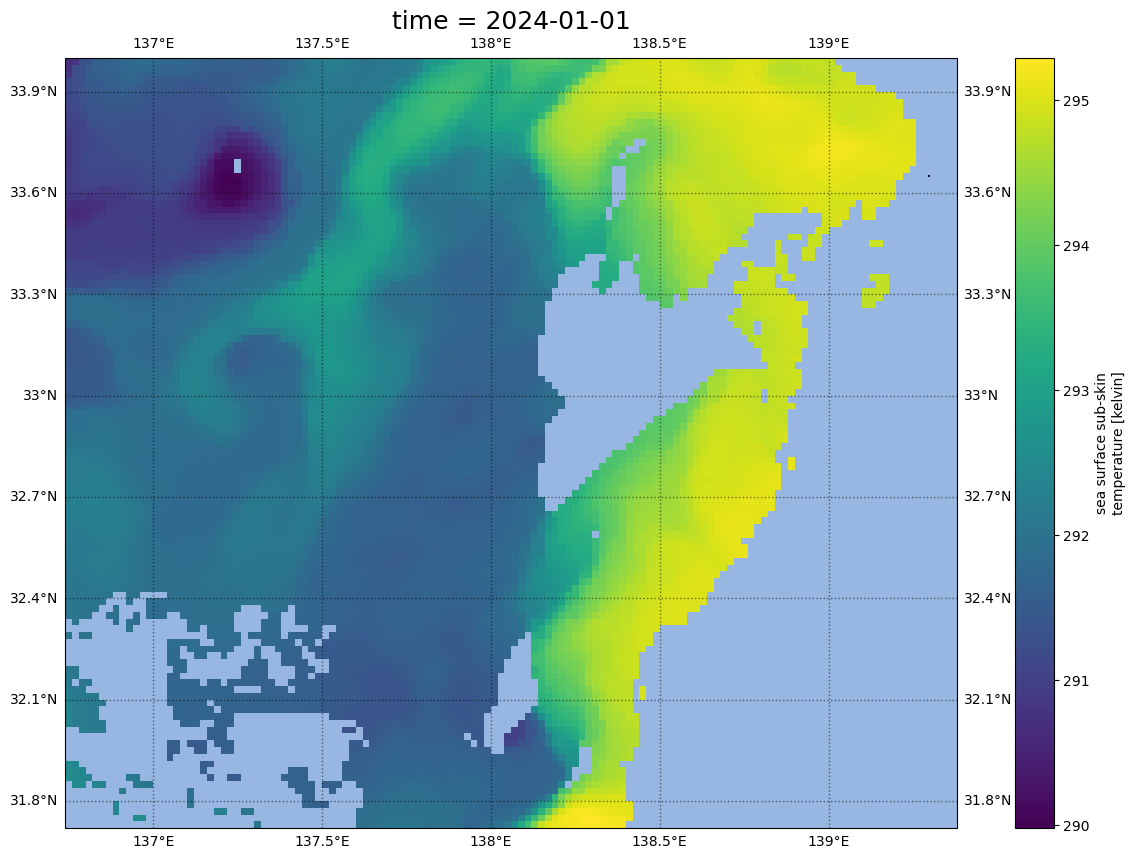

In [22]:
reload(putils)
ax = putils.show_one(dfile, 'sst', lat_max=34.0, lon_min=136.75, lat_min=31.717313, lon_max=139.387, outfile='himawari.png')

## Focus on:  32 12 48 N  and 134 36 44 E  (upper left corner;  go 500km down and right)